In [12]:
from newspaper import Article
article = Article('https://www.trt5.jus.br/noticias/trt-5-tera-plantao-excepcional-para-tratar-das-demandas-envolvendo-assedio-eleitoral#content', 'pt-br')
article.download()
article.parse()

In [13]:
article.text

'A desembargadora Luíza Lomba e a juíza Marília Sacramento atuarão como plantonistas, no âmbito da 2ª e 1ª instâncias do Tribunal Regional do Trabalho da 5ª Região (TRT-5), respectivamente, nestes sábado e domingo (29 e 30/10), para tratar das demandas envolvendo assédio eleitoral no trabalho. As informações para obter atendimento nestes casos estão no link Plantões do Portal do TRT-5.\n\nA designação das magistradas considerou o ofício do Presidente do CSJT e da Corregedora Geral da Justiça do Trabalho informando elevado número de casos de assédio eleitoral no trabalho que tem sido recebido pelo Ministério Público do Trabalho e a possibilidade de que ocorram situações emergenciais que exijam rápida intervenção do Estado durante o período eleitoral.\n\nSecom (Franklin Carvalho) - 28/10/2022'

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

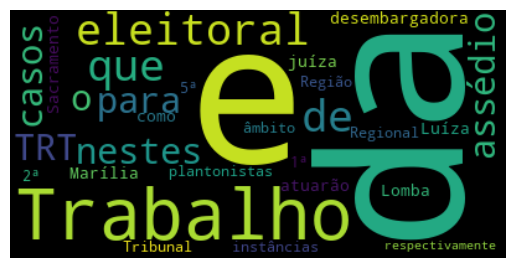

In [20]:
wc = WordCloud(max_words = 30)
wc.generate(article.text)
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TRT05\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


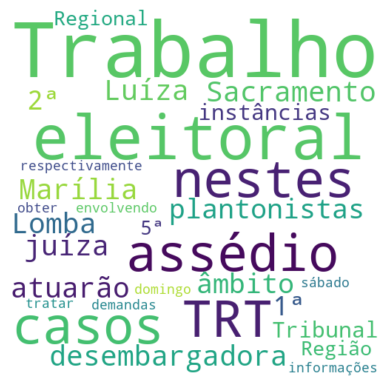

In [19]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = stopwords.words('portuguese')

wc = WordCloud(background_color = 'white', max_words = 30, stopwords = stopwords, max_font_size = 256, random_state = 42, width = 500, height = 500)
wc.generate(article.text)
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [21]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

def get_ngrams(text, n = 2):
  text = str(text)
  n_grams = ngrams(text.split(), n)
  returnVal = []

  try:
    for grams in n_grams:
      returnVal.append('_'.join(grams))
  except(RuntimeError):
    pass

  return ' '.join(returnVal).strip()


In [25]:
bigrams = get_ngrams(article.text, 2)
bigrams

'A_desembargadora desembargadora_Luíza Luíza_Lomba Lomba_e e_a a_juíza juíza_Marília Marília_Sacramento Sacramento_atuarão atuarão_como como_plantonistas, plantonistas,_no no_âmbito âmbito_da da_2ª 2ª_e e_1ª 1ª_instâncias instâncias_do do_Tribunal Tribunal_Regional Regional_do do_Trabalho Trabalho_da da_5ª 5ª_Região Região_(TRT-5), (TRT-5),_respectivamente, respectivamente,_nestes nestes_sábado sábado_e e_domingo domingo_(29 (29_e e_30/10), 30/10),_para para_tratar tratar_das das_demandas demandas_envolvendo envolvendo_assédio assédio_eleitoral eleitoral_no no_trabalho. trabalho._As As_informações informações_para para_obter obter_atendimento atendimento_nestes nestes_casos casos_estão estão_no no_link link_Plantões Plantões_do do_Portal Portal_do do_TRT-5. TRT-5._A A_designação designação_das das_magistradas magistradas_considerou considerou_o o_ofício ofício_do do_Presidente Presidente_do do_CSJT CSJT_e e_da da_Corregedora Corregedora_Geral Geral_da da_Justiça Justiça_do do_Trabalho 

In [26]:
trigrams = get_ngrams(article.text, 3)
trigrams

'A_desembargadora_Luíza desembargadora_Luíza_Lomba Luíza_Lomba_e Lomba_e_a e_a_juíza a_juíza_Marília juíza_Marília_Sacramento Marília_Sacramento_atuarão Sacramento_atuarão_como atuarão_como_plantonistas, como_plantonistas,_no plantonistas,_no_âmbito no_âmbito_da âmbito_da_2ª da_2ª_e 2ª_e_1ª e_1ª_instâncias 1ª_instâncias_do instâncias_do_Tribunal do_Tribunal_Regional Tribunal_Regional_do Regional_do_Trabalho do_Trabalho_da Trabalho_da_5ª da_5ª_Região 5ª_Região_(TRT-5), Região_(TRT-5),_respectivamente, (TRT-5),_respectivamente,_nestes respectivamente,_nestes_sábado nestes_sábado_e sábado_e_domingo e_domingo_(29 domingo_(29_e (29_e_30/10), e_30/10),_para 30/10),_para_tratar para_tratar_das tratar_das_demandas das_demandas_envolvendo demandas_envolvendo_assédio envolvendo_assédio_eleitoral assédio_eleitoral_no eleitoral_no_trabalho. no_trabalho._As trabalho._As_informações As_informações_para informações_para_obter para_obter_atendimento obter_atendimento_nestes atendimento_nestes_casos ne

In [24]:
def plot_cloud(wordcloud):
  fig = plt.figure(figsize=(25, 17), dpi=80)
  plt.tight_layout(pad=0)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.box(False)
  plt.show()
  plt.close() 

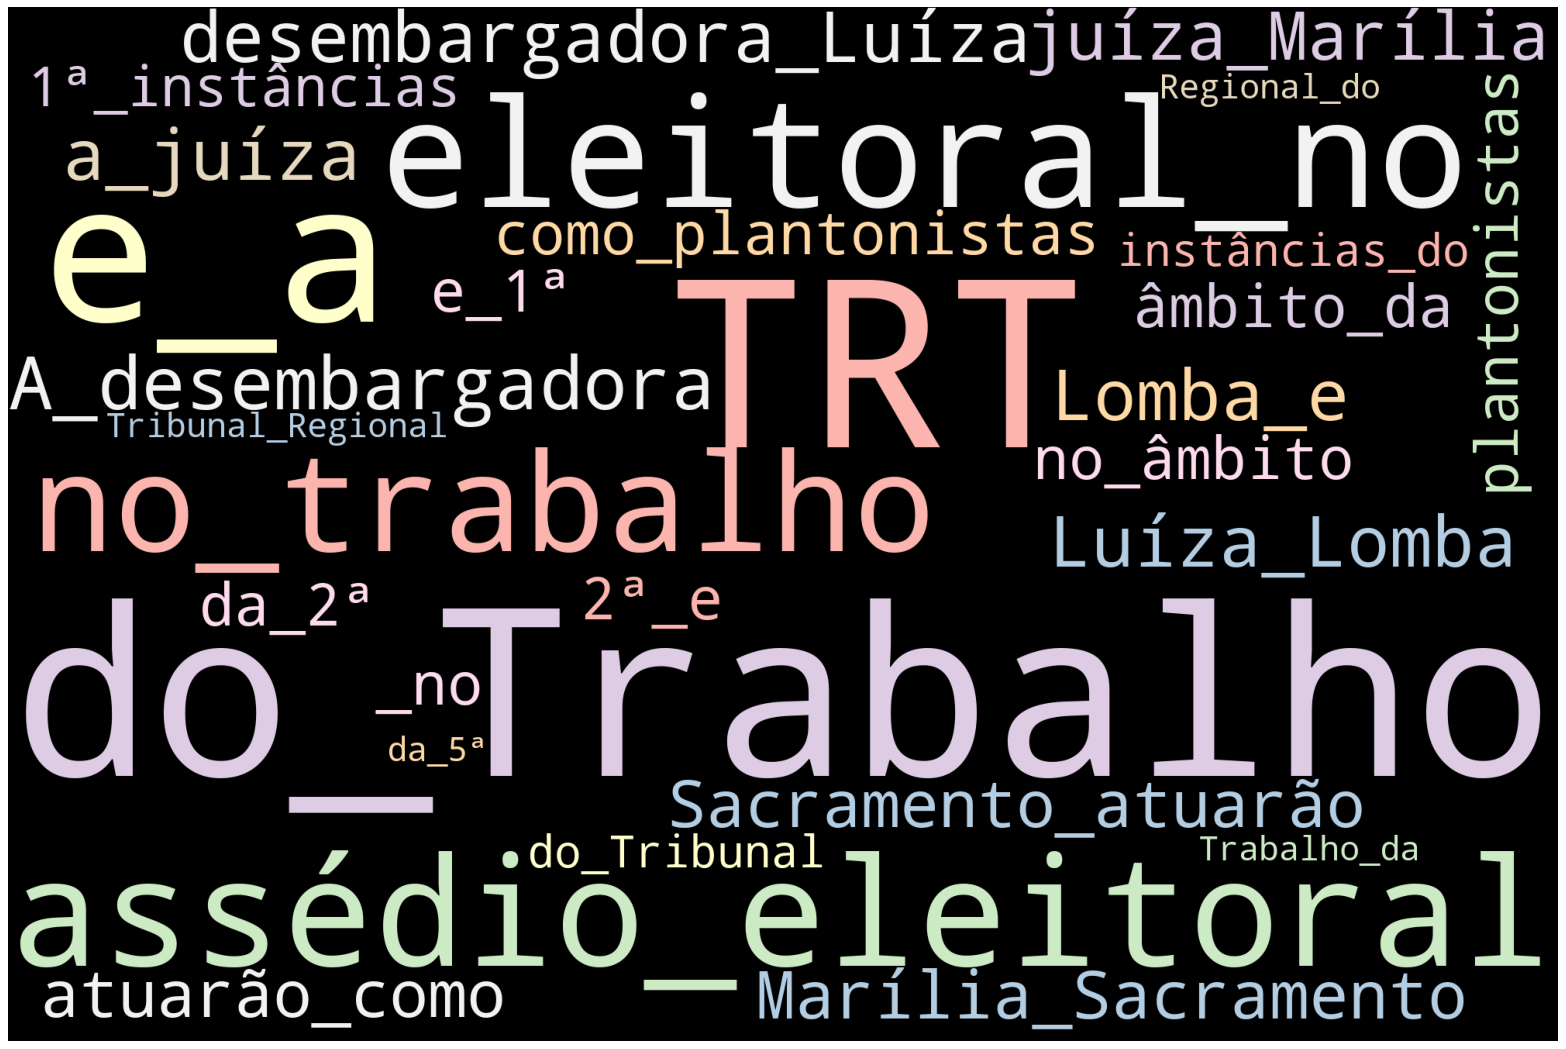

In [28]:
wordcloud = WordCloud(width = 2000, height = 1334, random_state=1, background_color='black', colormap='Pastel1', max_words = 30, collocations=False, normalize_plurals=False).generate(bigrams)
plot_cloud(wordcloud)

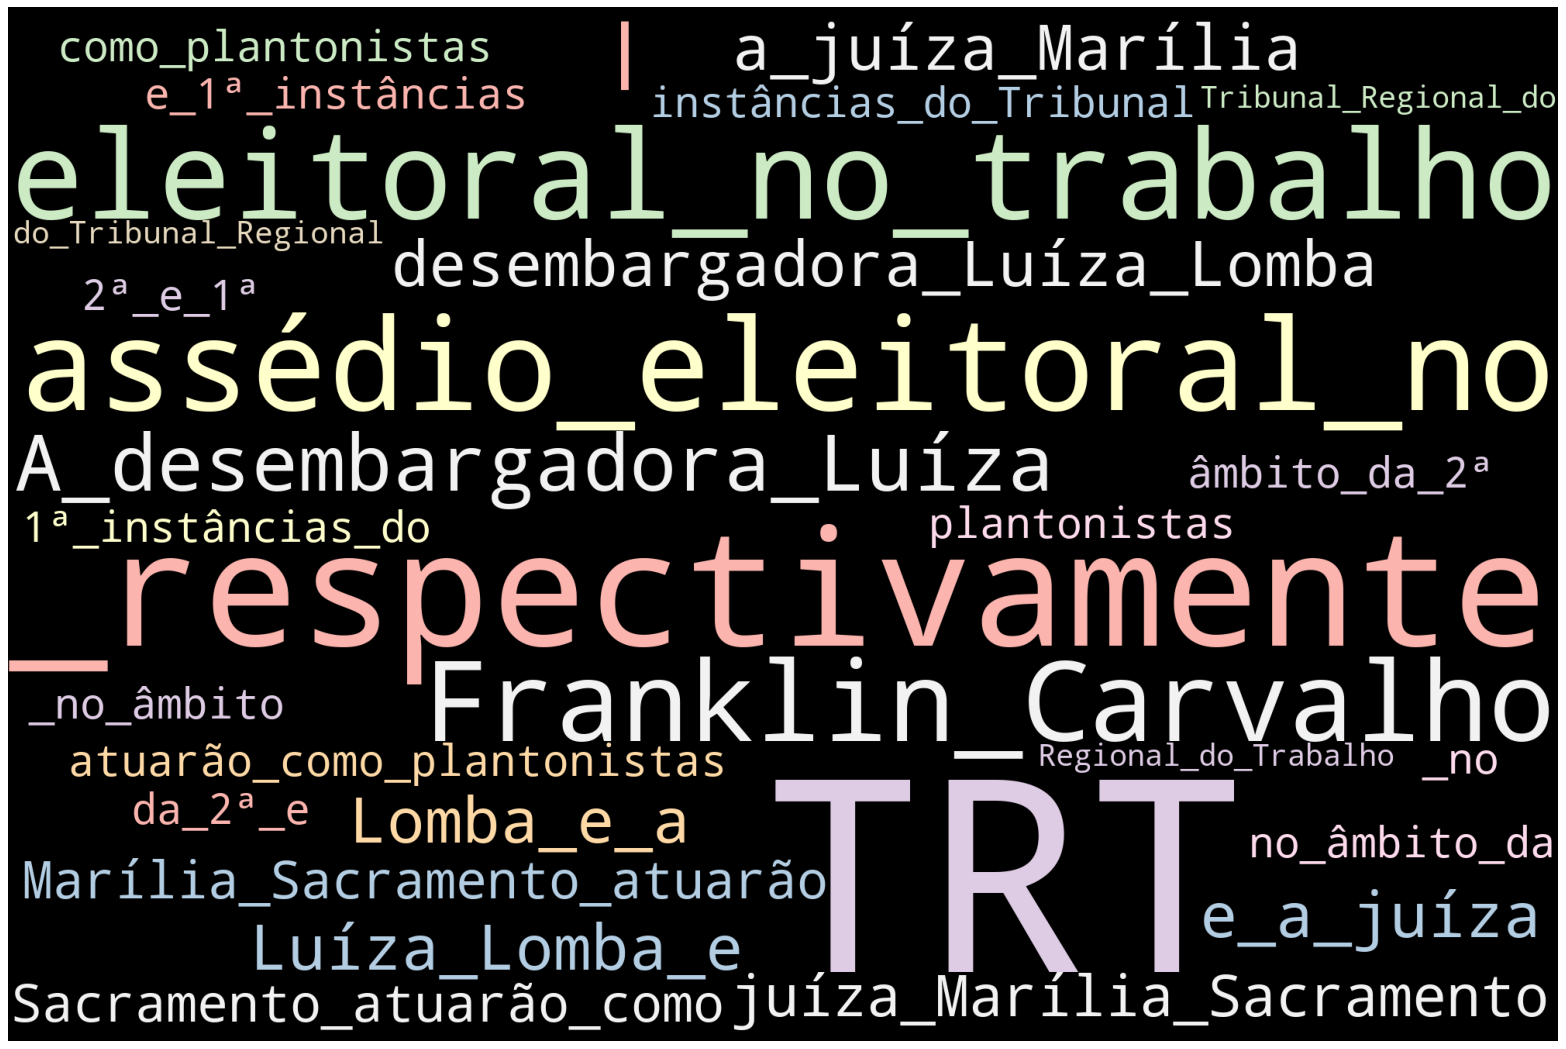

In [29]:
wordcloud = WordCloud(width = 2000, height = 1334, random_state=1, background_color='black', colormap='Pastel1', max_words = 30, collocations=False, normalize_plurals=False).generate(trigrams)
plot_cloud(wordcloud)